# A taste of feature engineering

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear regression
Linear regression aims to find  
a best-fitting line (or curve)

In [19]:
def noise(*shape, amp=1):
    return amp * np.random.randn(*shape)

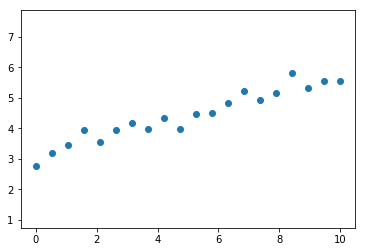

In [50]:
### make some sample data
x = np.linspace(0,10,20)
X = x[:, np.newaxis]
y = 3 + 0.3*x + noise(20, amp=0.2)
plt.axis('equal')
plt.scatter(x,y)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_model = model.predict(X)

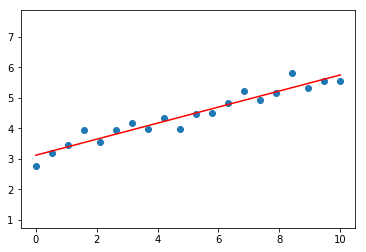

In [52]:
plt.axis('equal')
plt.scatter(x, y)
plt.plot(x, y_model, c='red')

In [53]:
model.intercept_

3.114834073578641

In [54]:
model.coef_

array([0.26378835])

A basic model of linear regression  
is to find `a` and `b`  
such that `a + b*x` is very close to `y`

In [55]:
a, b = model.intercept_, model.coef_[0]
df = pd.DataFrame({'1': np.ones_like(x), 
                   'x': x, 
                   'a+bx': a + b*x, 
                   'y_model': y_model, 
                   'y': y
                  })
df.head()

,1,x,a+bx,y_model,y
0,1.0,0.000000,3.114834,3.114834,2.775079
1,1.0,0.526316,3.253670,3.253670,3.191000
2,1.0,1.052632,3.392506,3.392506,3.435707
3,1.0,1.578947,3.531342,3.531342,3.953886
4,1.0,2.105263,3.670178,3.670178,3.556848


It aims to minimize the `error`,  
where `error = sum of (y[i] - y_model[i])**2`

In [56]:
error = ((y - y_model)**2).sum()
error

1.0057701170869802

If `fit_intercept=False`  
then the column `1` will be omitted  
and the algorithm uses `bx` to fit `y`

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)

The outcome becomes less desired

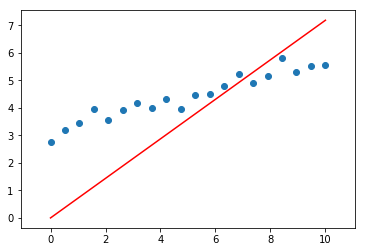

In [58]:
plt.axis('equal')
plt.scatter(x, y)
plt.plot(x, y_model, c='red')

In [59]:
b = model.coef_[0]
df = pd.DataFrame({'1': np.ones_like(x), 
                   'x': x, 
                   'bx': b*x, 
                   'y_model': y_model, 
                   'y': y
                  })
df.head()

,1,x,bx,y_model,y
0,1.0,0.000000,0.000000,0.000000,2.775079
1,1.0,0.526316,0.378439,0.378439,3.191000
2,1.0,1.052632,0.756877,0.756877,3.435707
3,1.0,1.578947,1.135316,1.135316,3.953886
4,1.0,2.105263,1.513754,1.513754,3.556848


Adding new features (columns)  
increase the flexibility of a model|

## Adding features
one may add `1` or `x**2`  
to the features  
or even `1/x` or `np.exp(x)`

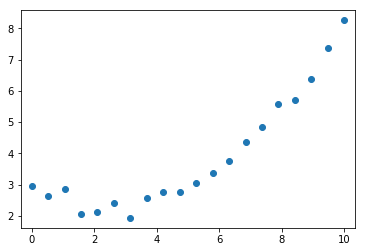

In [68]:
### make some sample data
x = np.linspace(0,10,20)
X = x[:, np.newaxis]
y = 3 - 0.5*x + 0.1*x**2 + noise(20, amp=0.2)
plt.axis('equal')
plt.scatter(x,y)

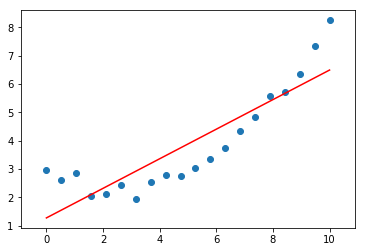

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_model = model.predict(X)

plt.axis('equal')
plt.scatter(x, y)
plt.plot(x, y_model, c='red')

In [73]:
df = pd.DataFrame({
        '1': np.ones_like(x), 
        'x': x, 
        'x**2': x**2
    })
df.head()

,1,x,x**2
0,1.0,0.000000,0.000000
1,1.0,0.526316,0.277008
2,1.0,1.052632,1.108033
3,1.0,1.578947,2.493075
4,1.0,2.105263,4.432133


In [76]:
from sklearn.linear_model import LinearRegression
X = df.values ### use the features in df to train
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)

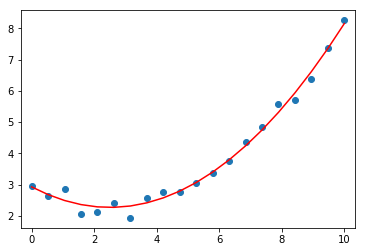

In [77]:
plt.axis('equal')
plt.scatter(x, y)
plt.plot(x, y_model, c='red')

In [78]:
a,b,c = model.coef_
df = pd.DataFrame({
        '1': np.ones_like(x), 
        'x': x, 
        'x**2': x**2, 
        'a+bx+cx**2': a + b*x + c*x**2, 
        'y_model': y_model, 
        'y': y
    })
df.head()

,1,x,x**2,a+bx+cx**2,y_model,y
0,1.0,0.000000,0.000000,2.927729,2.927729,2.967672
1,1.0,0.526316,0.277008,2.680779,2.680779,2.619838
2,1.0,1.052632,1.108033,2.491806,2.491806,2.875053
3,1.0,1.578947,2.493075,2.360812,2.360812,2.050141
4,1.0,2.105263,4.432133,2.287795,2.287795,2.131309


$a+bx+cx^2$ is not linear in terms of $x$  
but it is linear in terms of $1$, $x$, and $x^2$

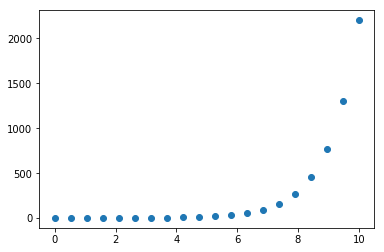

In [82]:
### make some sample data
x = np.linspace(0,10,20)
X = x[:, np.newaxis]
y = 3 - 0.5*x + 0.1*np.exp(x) + noise(20, amp=0.2)
plt.scatter(x,y)

In [83]:
df = pd.DataFrame({
        '1': np.ones_like(x), 
        'x': x, 
        'exp(x)': np.exp(x)
    })
df.head()

,1,x,exp(x)
0,1.0,0.000000,1.000000
1,1.0,0.526316,1.692685
2,1.0,1.052632,2.865181
3,1.0,1.578947,4.849848
4,1.0,2.105263,8.209263


In [84]:
from sklearn.linear_model import LinearRegression
X = df.values ### use the features in df to train
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)

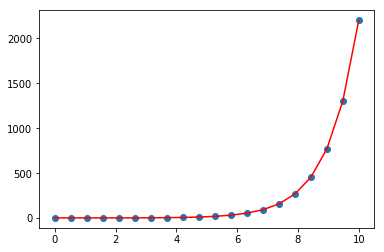

In [86]:
plt.scatter(x, y)
plt.plot(x, y_model, c='red')

In [87]:
a,b,c = model.coef_
df = pd.DataFrame({
        '1': np.ones_like(x), 
        'x': x, 
        'exp(x)': np.exp(x), 
        'a+bx+c exp(x)': a + b*x + c*np.exp(x), 
        'y_model': y_model, 
        'y': y
    })
df.head()

,1,x,exp(x),a+bx+c exp(x),y_model,y
0,1.0,0.000000,1.000000,3.020977,3.020977,3.068310
1,1.0,0.526316,1.692685,2.845574,2.845574,2.637043
2,1.0,1.052632,2.865181,2.718144,2.718144,2.467270
3,1.0,1.578947,4.849848,2.671918,2.671918,2.560163
4,1.0,2.105263,8.209263,2.763143,2.763143,2.759610


## Categorial data
Categorial data uses numbers to   
represent each category  
but it does not adopt the order of numbers

say `1` means brand A  
`2` stands for brand B and  
`3` stands for brand C

In [108]:
### make sample data
x = np.array([1]*10 + [2]*10 + [3]*10)
x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [109]:
y = np.concatenate([170 + noise(10), 
                    190 + noise(10), 
                    180 + noise(10)
                   ])
y

array([170.6186124 , 171.63891918, 169.36140213, 170.14398051,
       168.28824446, 170.90651901, 170.80093135, 169.90982529,
       170.13481793, 168.12987155, 190.27994297, 188.84122851,
       188.55255496, 190.02932168, 190.26462507, 189.63500964,
       187.60350445, 188.94932984, 190.79438069, 190.42321292,
       181.06396658, 179.11347052, 178.46031765, 181.58464206,
       180.63909944, 180.91696432, 179.55400555, 179.06618575,
       180.36392545, 178.88629081])

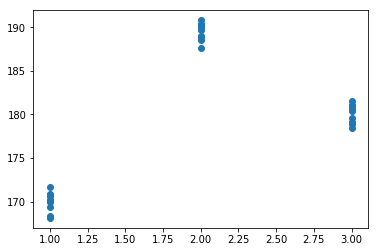

In [110]:
plt.scatter(x, y)

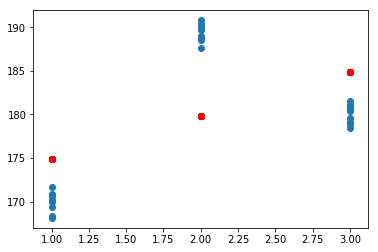

In [111]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression()
model.fit(X, y)
y_model = model.predict(X)

plt.scatter(x, y)
plt.scatter(x, y_model, c='red')

One may replace the categorial data  
by its **one-hot encoding**

In [127]:
df = pd.get_dummies(x)
df

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


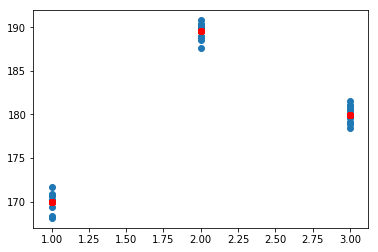

In [128]:
from sklearn.linear_model import LinearRegression
X = df.values ### use the features in df to train
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_model = model.predict(X)

plt.scatter(x, y)
plt.scatter(x, y_model, c='red')

In [131]:
a,b,c = model.coef_
df = pd.get_dummies(x)
df['ax1+bx2+cx3'] = a*df[1] + b*df[2] + c*df[3]
df['y_model'] = y_model
df['y'] = y
df.iloc[[0,10,20],:]

,1,2,3,ax1+bx2+cx3,y_model,y
0,1,0,0,169.993312,169.993312,170.618612
10,0,1,0,189.537311,189.537311,190.279943
20,0,0,1,179.964887,179.964887,181.063967


In this case  
`model.coef_` are exactly  
the prediction of the prices  
of each brand

In [130]:
model.coef_

array([169.99331238, 189.53731107, 179.96488681])